
## 평균필터

**1. 이론적 배경**


평균 필터는 다음과 같은 상황에서 유용합니다:

-  **실시간 데이터 스트림 처리**: 새로운 데이터가 들어올 때마다 그 값을 이용해 빠르게 평균을 업데이트해야 하는 경우.
-  **노이즈 제거**: 측정된 데이터에 포함된 잡음을 제거하고, 부드러운 신호를 생성하는 데 효과적입니다.
-  **계산 자원의 절약**: 데이터를 다시 계산하지 않고, 이전 값을 활용하여 연산을 최소화할 수 있습니다.

 **2.** **수식**


평균 필터는 기본적으로 **재귀식**을 사용하여 데이터를 처리합니다. 이때의 수식은 다음과 같습니다.


**재귀적 평균 필터 수식:**


 ${\bar{x} }_k =\alpha {\bar{x} }_{k-1} +(1-\alpha )$ ​


여기서,

-  $\displaystyle \alpha =\frac{k-1}{k},$
-  $k$ 는 현재까지 입력된 데이터의 개수,
-  $x_k$ 는 현재 입력된 데이터,
-  ${\bar{x} }_k$ ​는 현재까지의 평균값입니다.

이 수식은 새로운 데이터가 들어올 때마다, 이전 평균을 가중치 $\alpha$ 로 반영하고, 새로 입력된 데이터 $x_k$ ​를 가중치 $1-\alpha$ 로 반영하여 평균을 업데이트합니다.


 **3.** **구체적 사례**


위에서 다룬 사례처럼, **전압 측정**과 같은 실험 환경에서 평균 필터는 유용하게 사용됩니다. 예를 들어, 배터리 전압을 측정할 때 잡음이 있는 전압 신호를 평균 필터로 처리하여 안정적인 값을 도출할 수 있습니다.


**전압 측정 예시:**

-  전압 측정값:

$$x_1 =10V,x_2 =20V,x_3 =30Vx$$

-  각 측정값마다 평균 필터를 사용하여 평균값을 업데이트합니다.
-  필터 적용 후의 평균값은 잡음이 제거된 전압의 추정치를 나타냅니다.

In [1]:
function avg = AvgFilter(x)
    % persistent 변수는 이전 값을 저장함
    persistent prevAvg k;
    if isempty(k)
        k = 1; % 첫 실행 시 초기화
        prevAvg = 0; % 초기 평균값 0
    end

    % 재귀식 평균 필터 계산
    alpha = (k - 1) / k;
    avg = alpha * prevAvg + (1 - alpha) * x;

    % 값 업데이트
    prevAvg = avg;
    k = k + 1;
end

In [2]:
function z = GetVolt()
    % 가상 전압 값 생성 (평균 14.4V에 난수 추가)
    w = 4 * randn(1, 1); % 난수
    z = 14.4 + w; % 실제 전압 값
end



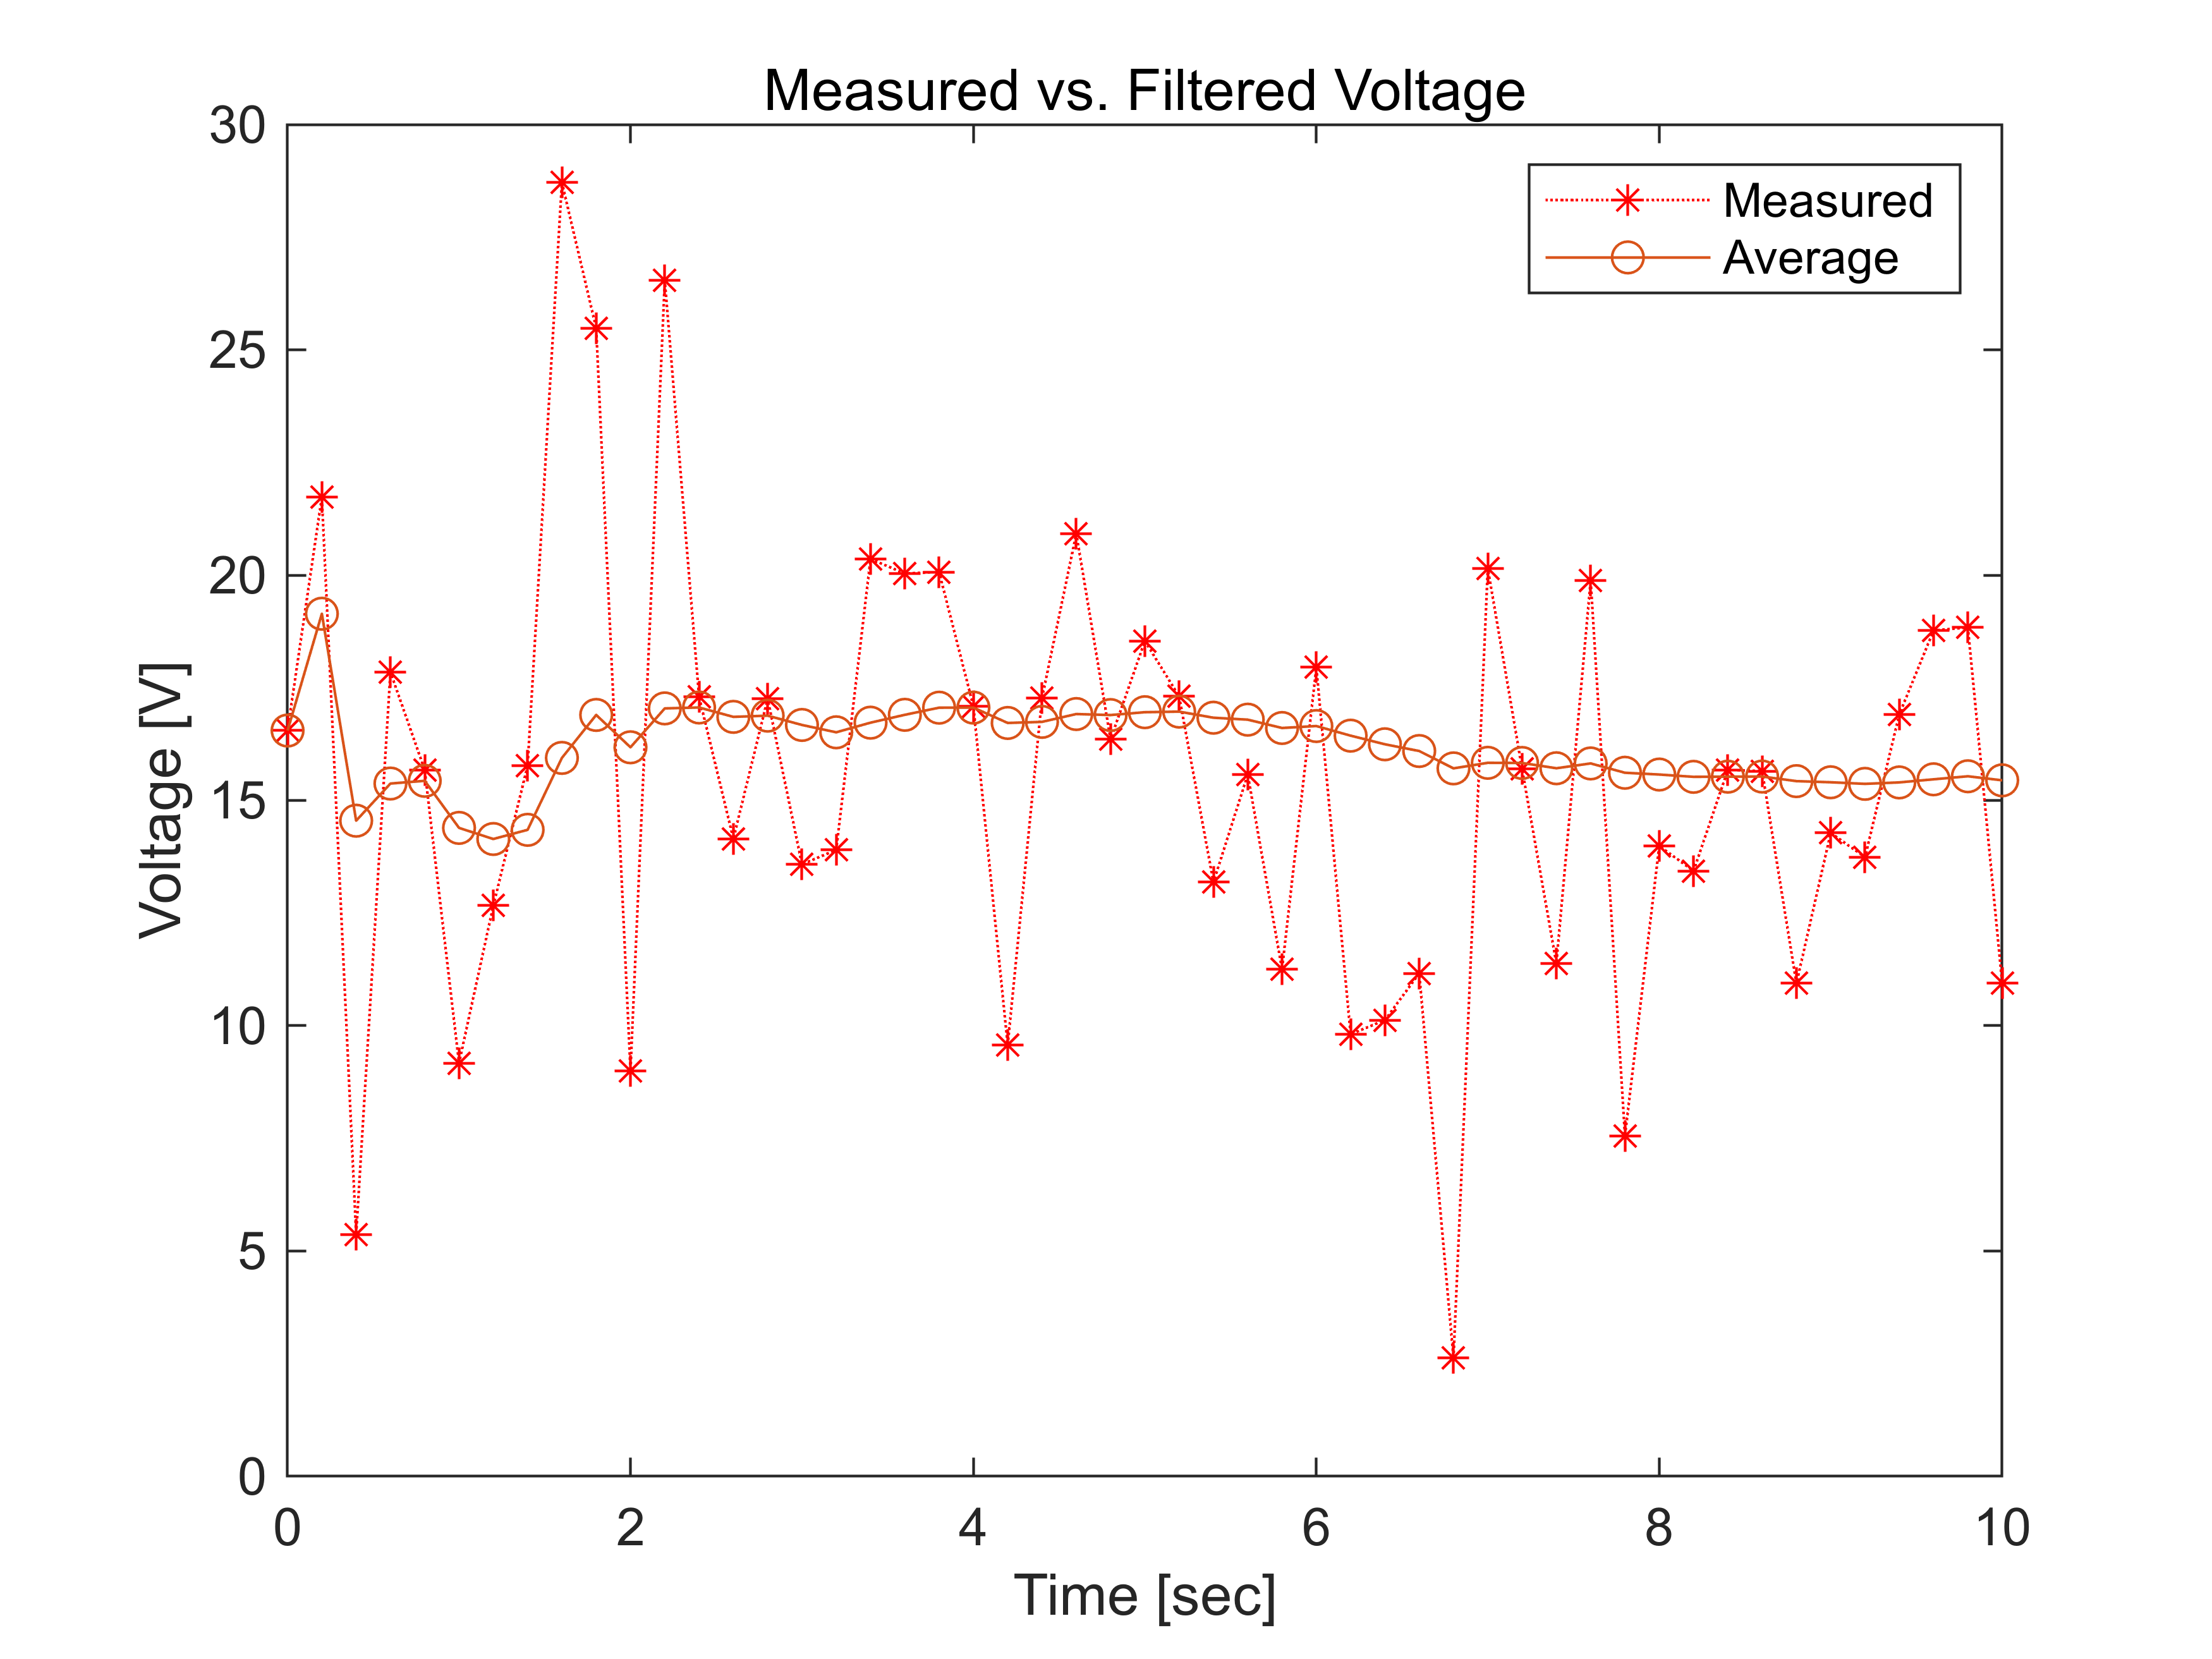

In [3]:
% 초기화
clear all;
dt = 0.2; % 시간 간격
t = 0:dt:10; % 0부터 10초까지의 시간
Nsamples = length(t);

% 데이터 저장 배열
AvgSaved = zeros(Nsamples, 1);
XSaved = zeros(Nsamples, 1);

for k = 1:Nsamples
    % 측정된 전압 데이터 (난수 발생 함수 대체)
    xm = GetVolt();

    % 평균 필터 적용
    avg = AvgFilter(xm);

    % 데이터 저장
    AvgSaved(k) = avg;
    XSaved(k) = xm;
end

% 결과 시각화
figure;
plot(t, XSaved, 'r:*') % 측정된 데이터
hold on;
plot(t, AvgSaved, 'o-') % 필터된 평균 데이터
legend('Measured', 'Average');
title('Measured vs. Filtered Voltage');
xlabel('Time [sec]');
ylabel('Voltage [V]');

-  **Measured (측정된 전압)**: 빨간색 점선으로 표시된 신호는 측정된 전압 값입니다. 전압 값의 변동이 매우 크고, 노이즈가 포함되어 있어서 변동성이 높은 신호를 나타냅니다.
-  **Average (평균 필터를 적용한 전압)**: 주황색 원으로 표시된 신호는 평균 필터가 적용된 값입니다. 이 신호는 측정된 전압에 비해 매우 부드럽고, 노이즈가 제거된 상태로 안정적인 값을 나타냅니다.
-  **필터링 전 신호**: 원래 측정된 전압 신호는 노이즈와 큰 변동성을 보여줍니다. 시간 축을 따라 전압 값이 5V에서 25V까지 급격하게 변동하고 있습니다.
-  **필터링 후 신호**: 평균 필터가 적용된 전압 신호는 원래 신호의 변동성을 크게 줄이고, 14V에서 16V 사이에서 안정적인 평균 값을 유지하는 것을 확인할 수 있습니다. 이는 필터가 신호의 잡음을 효과적으로 제거했음을 보여줍니다.
